# Divergence, curl module and other field vector field parameters

This document present some examples of vector field processing using pygsf methods.

## Preliminary settings

In order to plot fields, we run the following commands:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

The modules to import for dealing with grids are:

In [2]:
from pygsf.mathematics.arrays import *

In [3]:
from pygsf.mathematics.geotransform import *

In [4]:
from pygsf.mathematics.mapping import *

## Fields and geotransform definitions

We calculate a theoretical, 2D vector field and check that the parameters calculated by *pygsf* is equal to the expected one.

We use a modified example from p. 67 in [1].

\begin{equation*}
 \vec{\mathbf{v}} = 0.0001 x y^3  \vec{\mathbf{i}} - 0.0002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}



In order to create the two grids that represent the x- and the y-components, we therefore define the following two "transfer" functions from coordinates to z values: 

In [5]:
def z_func_fx(x, y):

    return 0.0001 * x * y**3

def z_func_fy(x, y):

    return - 0.0002 * x**2 * y

The above functions define the value of the cells, using the given x and y geographic coordinates.

Gridded field values are calculated for the theoretical source vector field x- and y- components using the provided number of rows and columns for the grid:

In [6]:
rows=200; cols=200

In [7]:
size_x = 0.25; size_y = 0.25

In [8]:
tlx = 15.0; tly = 30.0 

Arrays components are defined in terms of indices *i* and *j*, so to transform array indices to geographical coordinates we use a geotransform. The one chosen is:

In [9]:
gt1 = GeoTransform(
    inTopLeftX=tlx, 
    inTopLeftY=tly, 
    inPixWidth=size_x, 
    inPixHeight=size_y)

Note that the chosen geotransform has no axis rotation, as is in the most part of cases with geographic grids.

### vector field x-component

In [10]:
fx = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fx)

In [11]:
print(fx)

[[ 40.32915525  40.99575286  41.66235046 ... 171.64888391 172.31548152
  172.98207913]
 [ 39.32515657  39.97515916  40.62516174 ... 167.37566638 168.02566897
  168.67567156]
 [ 38.33796082  38.97164612  39.60533142 ... 163.17396545 163.80765076
  164.44133606]
 ...
 [-11.00070496 -11.18253479 -11.36436462 ... -46.82118225 -47.00301208
  -47.18484192]
 [-11.43205696 -11.62101658 -11.8099762  ... -48.65710193 -48.84606155
  -49.03502117]
 [-11.87454001 -12.0708134  -12.26708679 ... -50.54039758 -50.73667097
  -50.93294436]]


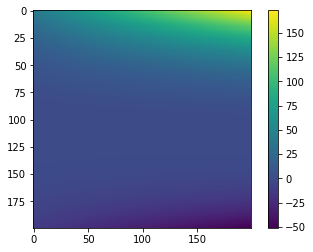

In [12]:
plt.imshow(fx); plt.colorbar()

### vector field y-component

In [13]:
fy = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fy)

In [14]:
print(fy)

[[ -1.36687461  -1.41243398  -1.45874023 ... -24.76124023 -24.95393398
  -25.14737461]
 [ -1.35543633  -1.40061445  -1.4465332  ... -24.5540332  -24.74511445
  -24.93693633]
 [ -1.34399805  -1.38879492  -1.43432617 ... -24.34682617 -24.53629492
  -24.72649805]
 ...
 [  0.8864668    0.91601367   0.94604492 ...  16.05854492  16.18351367
   16.3089668 ]
 [  0.89790508   0.9278332    0.95825195 ...  16.26575195  16.3923332
   16.51940508]
 [  0.90934336   0.93965273   0.97045898 ...  16.47295898  16.60115273
   16.72984336]]


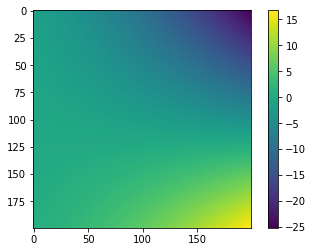

In [15]:
plt.imshow(fy); plt.colorbar()

## Testing divergence

The definition of divergence for our 2D case is:

\begin{align}
divergence = \nabla \cdot \vec{\mathbf{v}} & = \frac{\partial{v_x}}{\partial x} + \frac{\partial{v_y}}{\partial y}
\end{align}

### theoretical divergence

Since the vector field formula is:

\begin{equation*}
 \vec{\mathbf{v}} = 0.0001 x y^3  \vec{\mathbf{i}} - 0.0002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}

the theoretical divergence transfer function is:

In [16]:
def z_func_div(x, y):
    
    return 0.0001 * y**3 - 0.0002 * x**2

The theoretical divergence field can be created using the function expressing the analytical derivatives *z_func_div*:

In [17]:
theor_div = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_div)

In [18]:
print(theor_div)

[[ 2.6206373   2.6191123   2.6175623  ...  1.8375623   1.8311123
   1.8246373 ]
 [ 2.55425723  2.55273223  2.55118223 ...  1.77118223  1.76473223
   1.75825723]
 [ 2.48898809  2.48746309  2.48591309 ...  1.70591309  1.69946309
   1.69298809]
 ...
 [-0.77307246 -0.77459746 -0.77614746 ... -1.55614746 -1.56259746
  -1.56907246]
 [-0.8015916  -0.8031166  -0.8046666  ... -1.5846666  -1.5911166
  -1.5975916 ]
 [-0.83084668 -0.83237168 -0.83392168 ... -1.61392168 -1.62037168
  -1.62684668]]


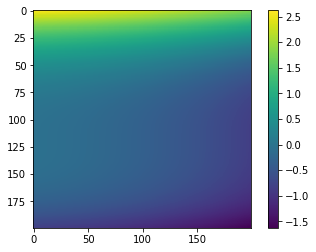

In [19]:
plt.imshow(theor_div); plt.colorbar()

### pygsf-estimated divergence

Divergence as resulting from pygsf calculation:

In [20]:
div = divergence_2D(
    fld_x=fx, 
    fld_y=fy, 
    cell_size_x=size_x, 
    cell_size_y=size_y)

In [21]:
print(div)

[[ 2.6206373   2.6191123   2.6175623  ...  1.8375623   1.8311123
   1.8246373 ]
 [ 2.55425723  2.55273223  2.55118223 ...  1.77118223  1.76473223
   1.75825723]
 [ 2.48898809  2.48746309  2.48591309 ...  1.70591309  1.69946309
   1.69298809]
 ...
 [-0.77307246 -0.77459746 -0.77614746 ... -1.55614746 -1.56259746
  -1.56907246]
 [-0.8015916  -0.8031166  -0.8046666  ... -1.5846666  -1.5911166
  -1.5975916 ]
 [-0.83084668 -0.83237168 -0.83392168 ... -1.61392168 -1.62037168
  -1.62684668]]


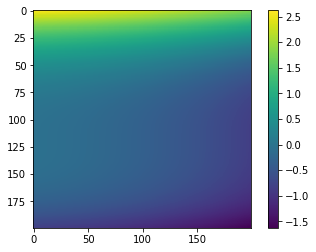

In [22]:
plt.imshow(div); plt.colorbar()

We check whether the theoretical and the estimated divergence fields are close:

In [23]:
np.allclose(theor_div, div)

True

## Testing curl module

The definition of curl module in our 2D case is:

\begin{equation*}
\nabla \times \vec{\mathbf{v}} =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial }{\partial x} &  \frac{\partial }{\partial y} & \frac{\partial }{\partial z} \\
{v_x} &  {v_y} & 0
\end{vmatrix}
\end{equation*}

so that the module of the curl is:

\begin{equation*}
 |curl| = \frac{\partial v_y}{\partial x} - \frac{\partial v_x}{\partial y}
\end{equation*}

### theoretical curl module

The vector function is:

\begin{equation*}
 \vec{\mathbf{v}} = 0.0001 x y^3  \vec{\mathbf{i}} - 0.0002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}

therefore the theoretical curl module is:

\begin{equation*}
 curl = 0.0004 x y + 0.0003 x y^2
\end{equation*}

so that the theoretical transfer function is:

In [24]:
def z_func_curl_mod(x, y):
    
    return 0.0004 * x * y + 0.0003 * x * y**2

The theoretical divergence field can be created using the function expressing the analytical derivatives *z_func_div*:

In [25]:
theor_curl_mod = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_curl_mod)

In [26]:
print(theor_curl_mod)

[[ 4.2305334   4.30045957  4.37038574 ... 18.00598926 18.07591543
  18.1458416 ]
 [ 4.16152559  4.23031113  4.29909668 ... 17.71227832 17.78106387
  17.84984941]
 [ 4.09308496  4.16073926  4.22839355 ... 17.42098145 17.48863574
  17.55629004]
 ...
 [ 1.58611621  1.61233301  1.6385498  ...  6.7508252   6.77704199
   6.80325879]
 [ 1.62884434  1.65576738  1.68269043 ...  6.93268457  6.95960762
   6.98653066]
 [ 1.67213965  1.69977832  1.72741699 ...  7.11695801  7.14459668
   7.17223535]]


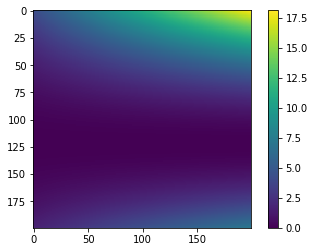

In [27]:
plt.imshow(theor_curl_mod); plt.colorbar()

### pygsf-estimated module of curl

The implementation of the curl module calculation has been debugged using the code at http://www.johnny-lin.com/ams2011/sc/arrays_io/as/hide/py-curl-soln.shtml by Johnny Lin (http://www.johnny-lin.com/index.shtml). Deviations from the expected theoretical values are the same for both implementations.

The module of curl as resulting from pygsf calculation is:

In [28]:
curl_module = curl_mod(
    fld_x=fx, 
    fld_y=fy, 
    cell_size_x=size_x, 
    cell_size_y=size_y)

In [29]:
print(curl_module)

[[ 4.23183809  4.30026738  4.37019043 ... 18.00518457 18.07510762
  18.14353691]
 [ 4.16310137  4.23040723  4.29919434 ... 17.71268066 17.78146777
  17.84877363]
 [ 4.09464824  4.16083535  4.22849121 ... 17.42138379 17.48903965
  17.55522676]
 ...
 [ 1.58524199  1.6124291   1.63864746 ...  6.75122754  6.7774459
   6.80463301]
 [ 1.62795762  1.65586348  1.68278809 ...  6.93308691  6.96001152
   6.98791738]
 [ 1.67095684  1.69958613  1.72722168 ...  7.11615332  7.14378887
   7.17241816]]


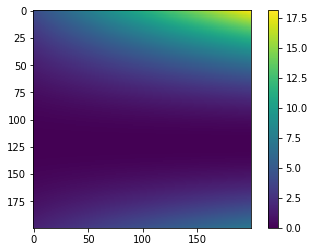

In [30]:
plt.imshow(curl_module); plt.colorbar()

We check whether the theoretical and the estimated curl module fields are close:

In [31]:
np.allclose(theor_curl_mod, curl_module)

False

We look at where there are significant differences between the theoretical and the empiric curl module fields, by calculating the percent difference between these two fields:

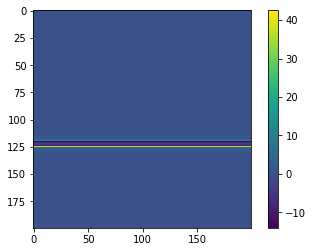

In [32]:
percent_diffs = 100.0*(curl_module - theor_curl_mod)/theor_curl_mod
plt.imshow(percent_diffs); plt.colorbar()

While the majority of the empiric values are near the theoretical ones, there is a horizontal strip at around *i=120* with very high deviances (both negative and positive) that are probably related to a "singularity" of the gradient along y of the v_x field.

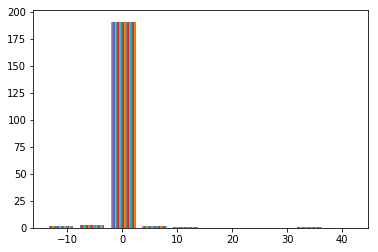

In [33]:
plt.hist(percent_diffs)  # arguments are passed to np.histogram
plt.show()

### References

[1] M. R. Spiegel, 1975. Analisi Vettoriale. Etas Libri, pp. 224.